# 의사결정나무 연습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/체질검사.csv')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop("FAT", axis=1)

In [5]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print(f'train data X size: {df_train_x.shape}')
print(f'train data Y size: {df_train_y.shape}')
print(f'test data X size: {df_test_x.shape}')
print(f'test data Y size: {df_test_y.shape}')

train data X size: (176, 13)
train data Y size: (176,)
test data X size: (76, 13)
test data Y size: (76,)


## 모델 생성

In [10]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.295


## 모델 parameter 조정

In [12]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1,20)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSampleLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [13]:
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


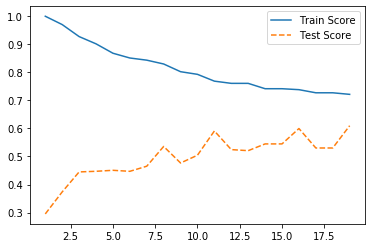

In [14]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.legend()

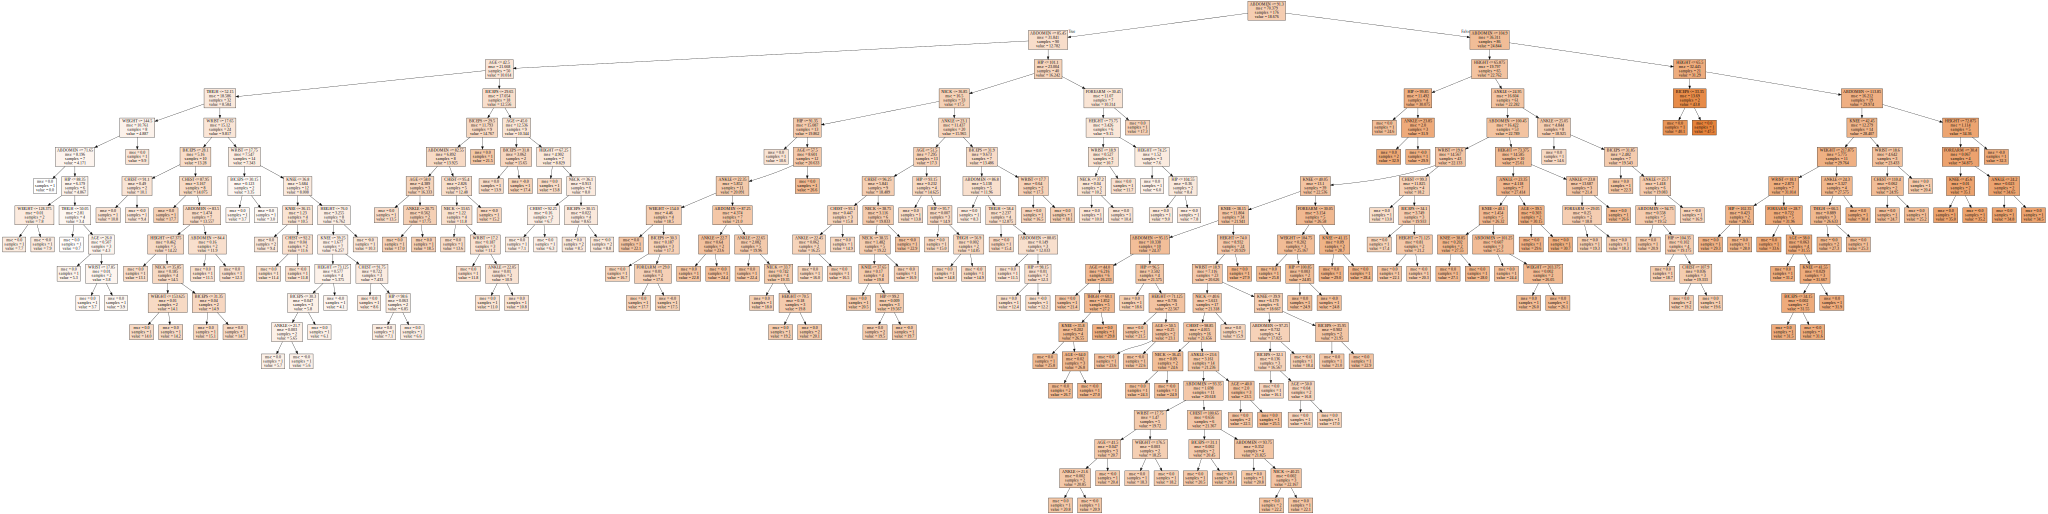

In [15]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

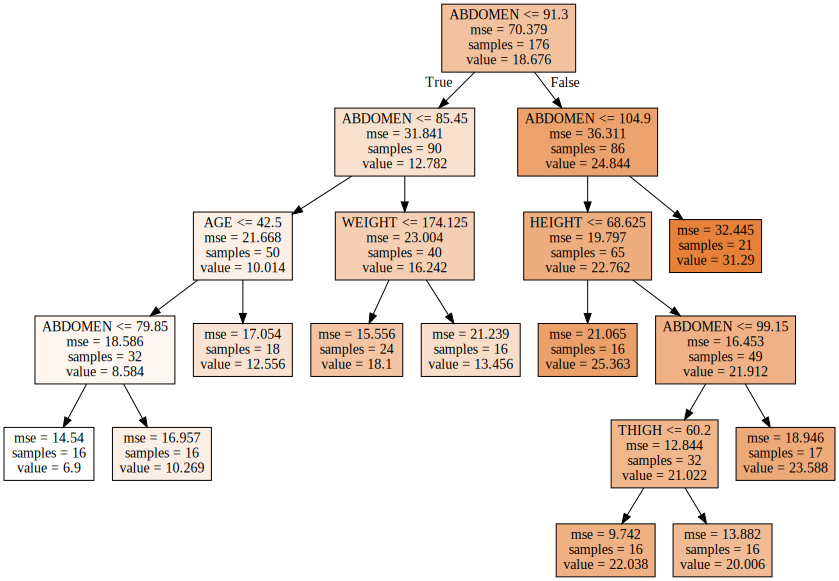

In [16]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [17]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSampleSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


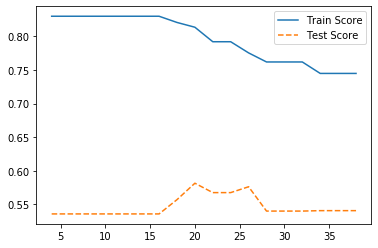

In [19]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.legend()

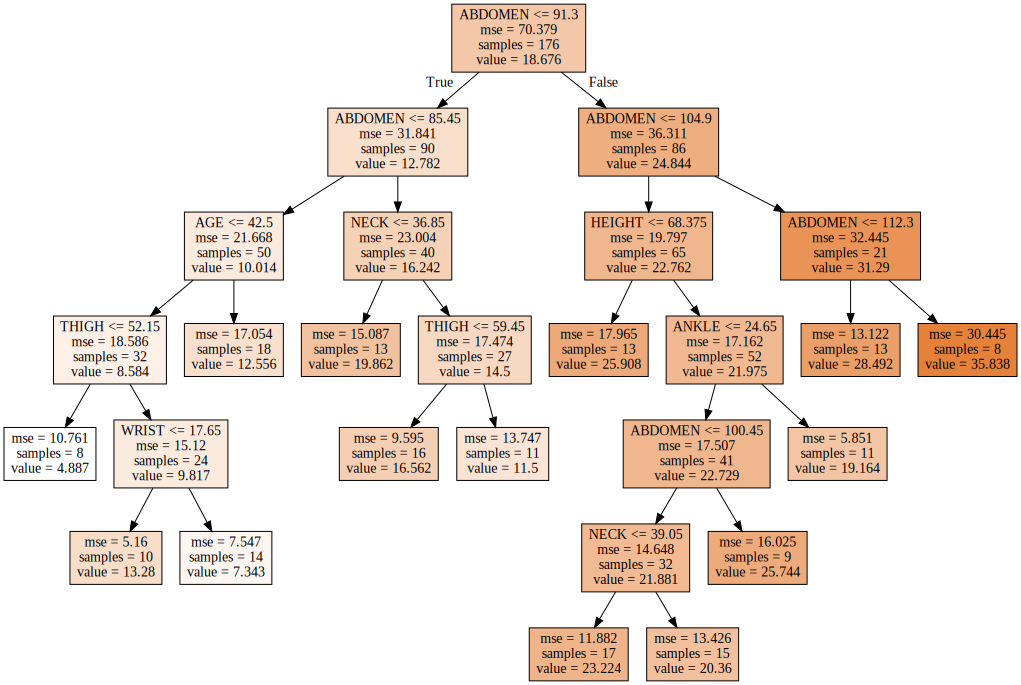

In [20]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

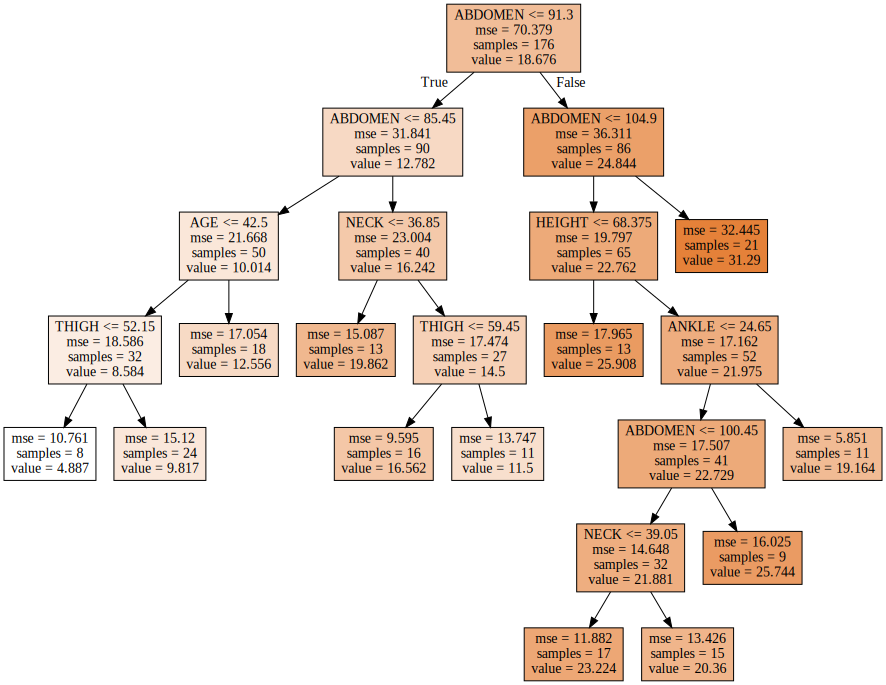

In [21]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_split.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [23]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


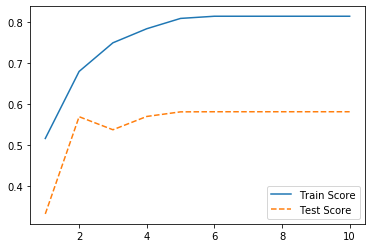

In [24]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.legend()

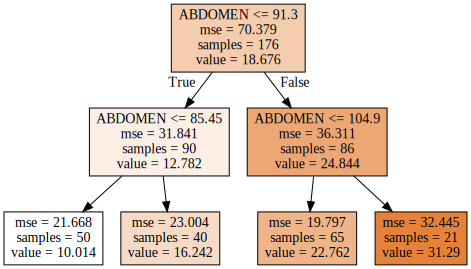

In [25]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

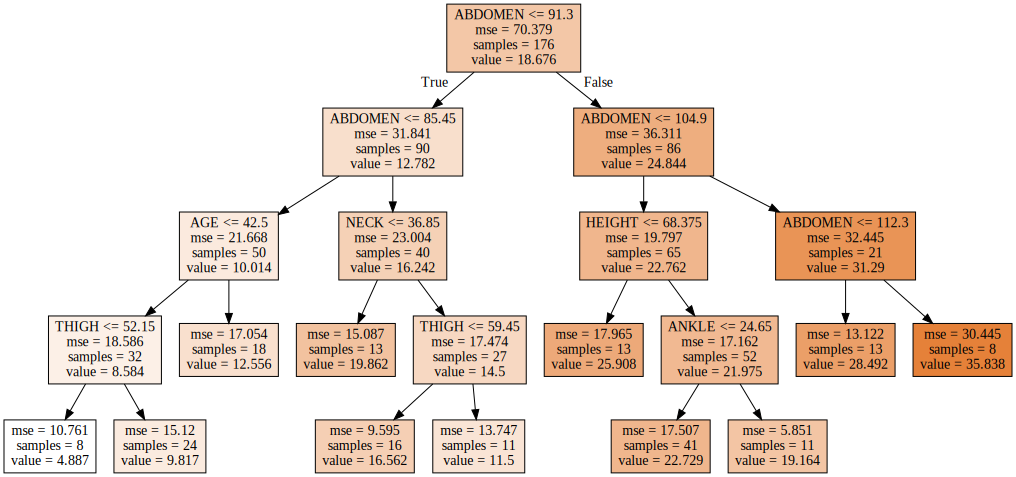

In [26]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_depth.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## 최종모델선정

In [84]:
tree_final = DecisionTreeRegressor(max_depth=2, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

print('train score: {}'.format(tree_final.score(df_train_x, df_train_y)))
print('test score: {}'.format(tree_final.score(df_test_x, df_test_y)))

train score: 0.6793563760212187
test score: 0.5694052847729575


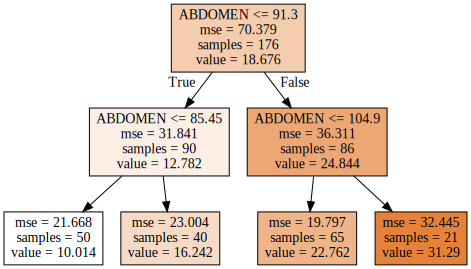

In [85]:
export_graphviz(tree_final, out_file='tree_final.dot', feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_final.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

## 결론 도출

In [29]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

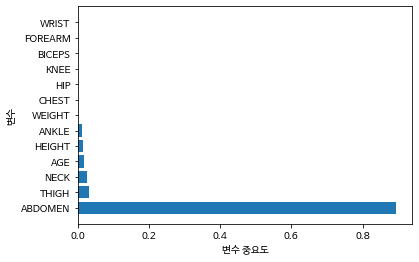

In [31]:
matplotlib.rc('font',family='NanumBarunGothic')

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [33]:
estimator = DecisionTreeRegressor()

param_grid = {'criterion':['mse', 'friedman_mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':para_depth,
             'min_samples_split':para_split,
             'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best estimator model: \n{grid_dt.best_estimator_}')
print(f'\nbest parameter: \n{grid_dt.best_params_}')
print(f'nbest score: \n{grid_dt.best_score_.round(3)}')

best estimator model: 
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=6,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

best parameter: 
{'criterion': 'mse', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 6}
nbest score: 
0.618


# 랜덤포레스트

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [87]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.956
Score on test set: 0.611


In [88]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [89]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


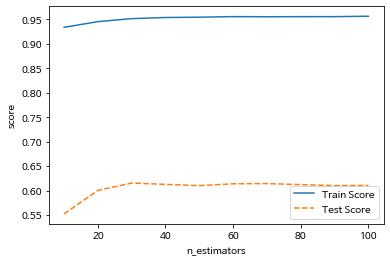

In [90]:
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [92]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['n_estimators'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [93]:
df_score_leaf.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


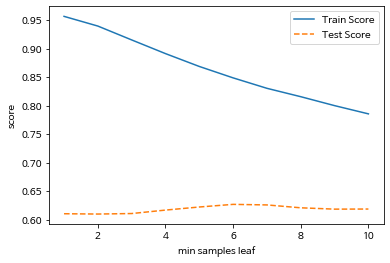

In [94]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

In [95]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=6, min_samples_split=v_min_samples_split, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['n_estimators'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [96]:
df_score_split.round(3)

,n_estimators,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


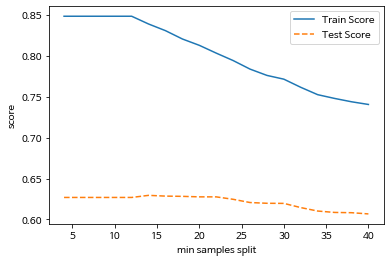

In [97]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [98]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=v_max_depth, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['n_estimators'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [99]:
df_score_depth.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


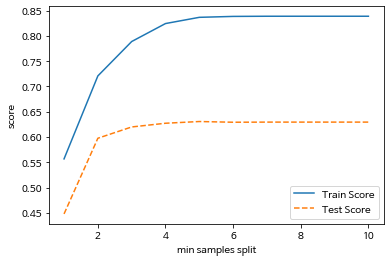

In [100]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [119]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=300, min_samples_leaf=3, min_samples_split=14, max_depth=6)

rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.861
Score on test set: 0.619


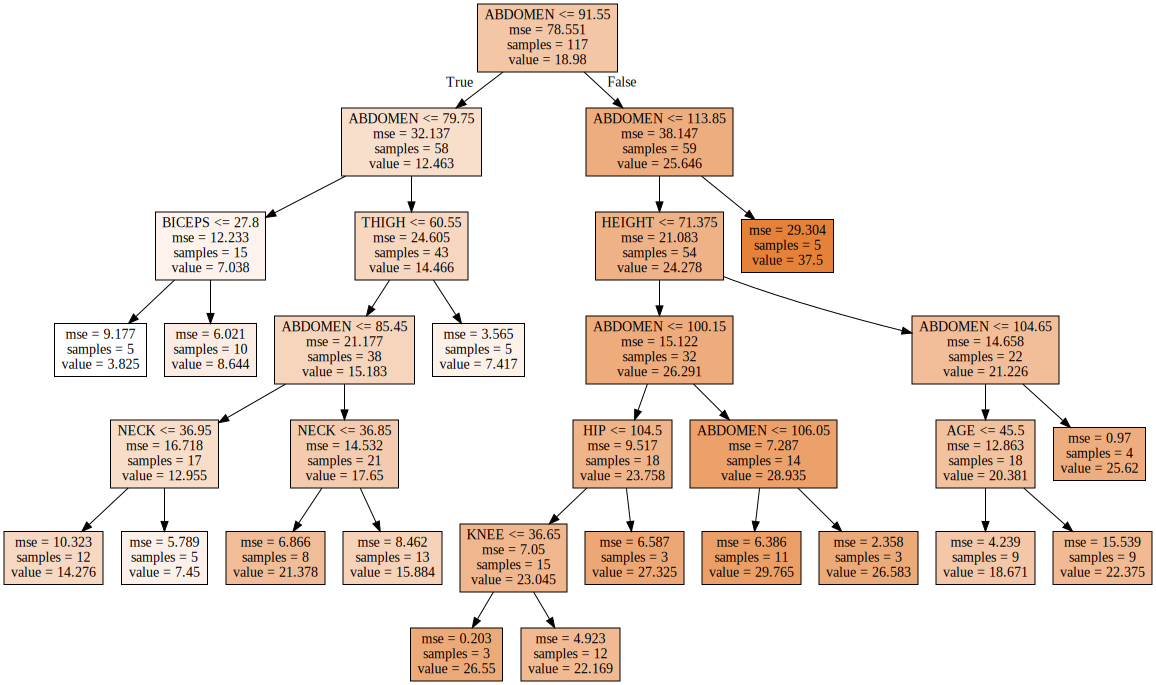

In [120]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file='rfr_final_0.dot', feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

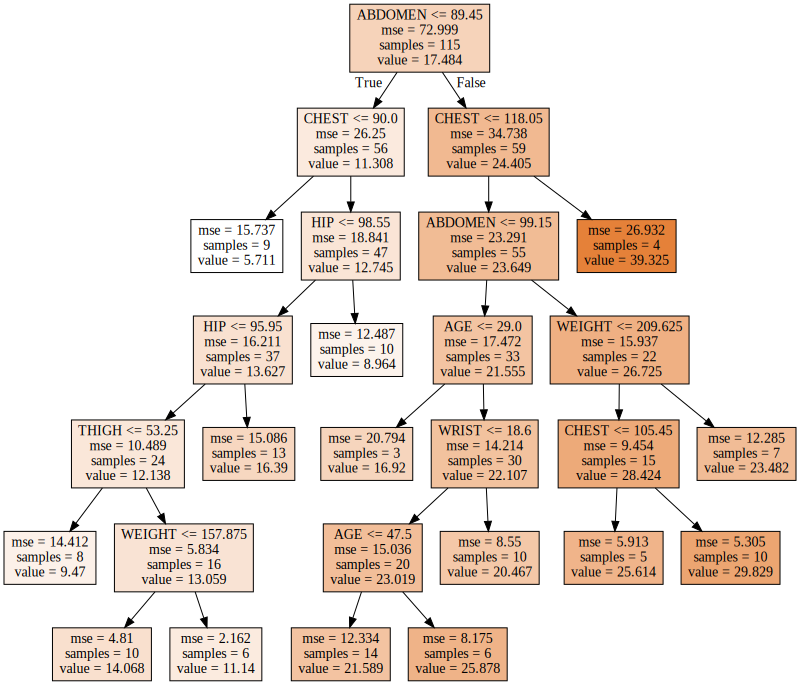

In [121]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[1], out_file='rfr_final_1.dot', feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

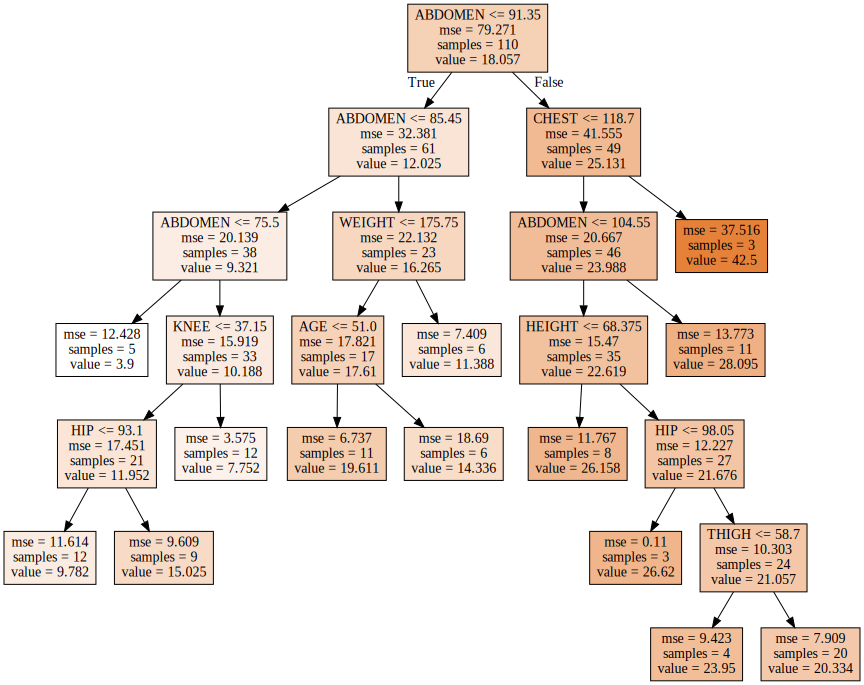

In [122]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[10], out_file='rfr_final_10.dot', feature_names=v_feature_name, impurity=True, filled=True)

with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [105]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
12,WRIST,0.010
3,NECK,0.010
8,KNEE,0.009
1,WEIGHT,0.008


Text(0, 0.5, '변수')

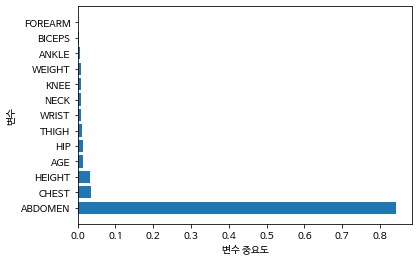

In [107]:
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [108]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {'max_depth': para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best estimator model: \n{grid_dt.best_estimator_}')
print(f'\nbest parameter: \n{grid_dt.best_params_}')
print(f'\nbest score: \n{grid_dt.best_score_.round(3)}')

best estimator model: 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 14}

best score: 
0.677


# 그래디언트 부스팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.981
Score on test set: 0.581


In [8]:
train_score = []
test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [9]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


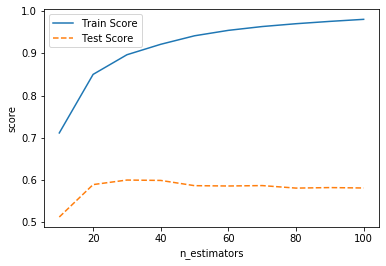

In [10]:
plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [11]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=30, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['n_estimators'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [12]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


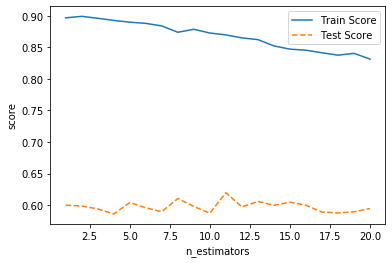

In [13]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [14]:
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=30, min_samples_leaf=11, min_samples_split=v_min_samples_split, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['n_estimators'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [15]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


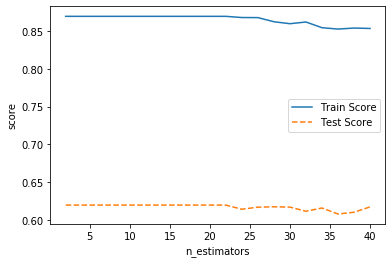

In [16]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [17]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=v_max_depth, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['n_estimators'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [18]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


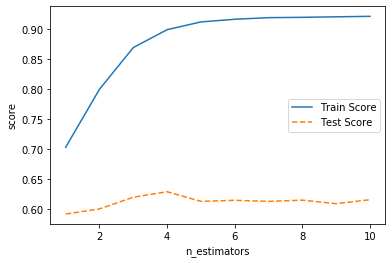

In [19]:
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [21]:
train_score = []
test_score = []

para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [22]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.586
6,70,0.963,0.587
7,80,0.970,0.581
8,90,0.976,0.582
9,100,0.981,0.581


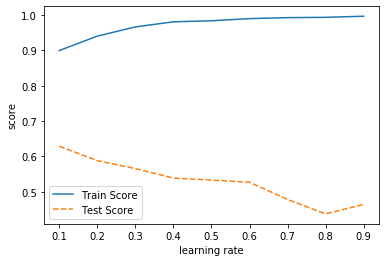

In [23]:
plt.plot(para_lr, train_score, linestyle='-', label='Train Score')
plt.plot(para_lr, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

In [24]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=0.1)

gb_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.900
Score on test set: 0.629


In [26]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

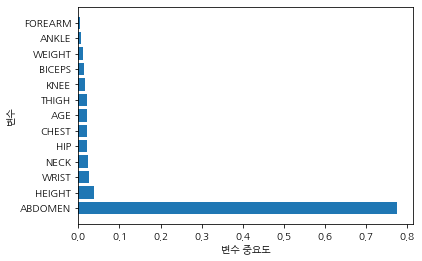

In [29]:
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [28]:
matplotlib.rc('font', family='NanumGothic')

In [30]:
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {'criterion':['mse', 'friedman_mse', 'mae'], 'max_features':['auto', 'sqrt', 'log2'],
              'max_depth': para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf, 'learning_rate':para_lr}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print(f'best estimator model: \n{grid_dt.best_estimator_}')
print(f'\nbest parameter: \n{grid_dt.best_params_}')
print(f'\nbest score: \n{grid_dt.best_score_.round(3)}')

KeyboardInterrupt: 